<a href="https://colab.research.google.com/github/Harini-Murugesan04/WasteClassification-week-1/blob/main/Garbage_classfication_Final_Submission_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setting up the Kaggle Credentials

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "ENTER YOUR KAGGLE USERNAME"
os.environ['KAGGLE_KEY'] = "ENTER YOUR KAGGLE KEY"


Downloading and Unzipping the Dataset

In [2]:
!kaggle datasets download -d farzadnekouei/trash-type-image-dataset
!unzip -q trash-type-image-dataset.zip -d /content/waste_data


Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
License(s): unknown
  0% 0.00/40.9M [00:00<?, ?B/s]
100% 40.9M/40.9M [00:00<00:00, 1.05GB/s]


Loading and Preparing the Data

In [7]:
data_path = "/content/waste_data/TrashType_Image_Dataset"
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


Building the Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_gen.num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,534 (431.77 KB)

 Trainable params: 110,534 (431.77 KB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [9]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 238s 4s/step - accuracy: 0.2127 - loss: 1.7461 - val_accuracy: 0.2346 - val_loss: 1.6970
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 254s 4s/step - accuracy: 0.2508 - loss: 1.6829 - val_accuracy: 0.3797 - val_loss: 1.5532
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 231s 4s/step - accuracy: 0.3596 - loss: 1.5730 - val_accuracy: 0.4135 - val_loss: 1.4276
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 250s 4s/step - accuracy: 0.3766 - loss: 1.5309 - val_accuracy: 0.3897 - val_loss: 1.5151
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 234s 4s/step - accuracy: 0.4061 - loss: 1.4717 - val_accuracy: 0.4215 - val_loss: 1.3739
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 233s 4s/step - accuracy: 0.4284 - loss: 1.4118 - val_accuracy: 0.4394 - val_loss: 1.3807
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.4440 - loss: 1.3700 - val_accuracy: 0.5209 - val_loss: 1.3072
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 231s 4s/step - accuracy: 0.4804 - loss: 1.3296 - val_accuracy: 0.5328 - v

Saving the Model

In [10]:
model.save("waste_classifier_model.h5")
print("✅ Model saved successfully!")

✅ Model saved successfully!


Plotting Accuracy of the Model

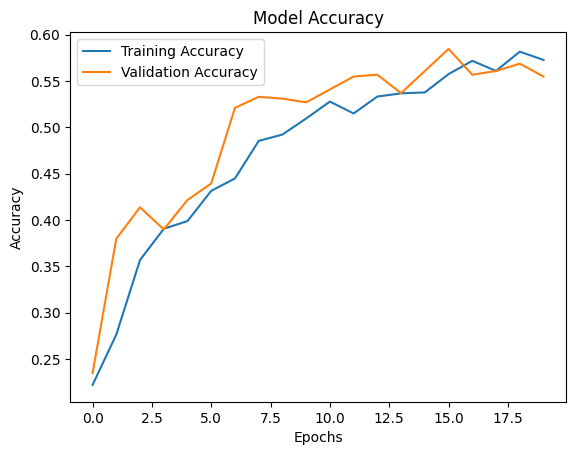

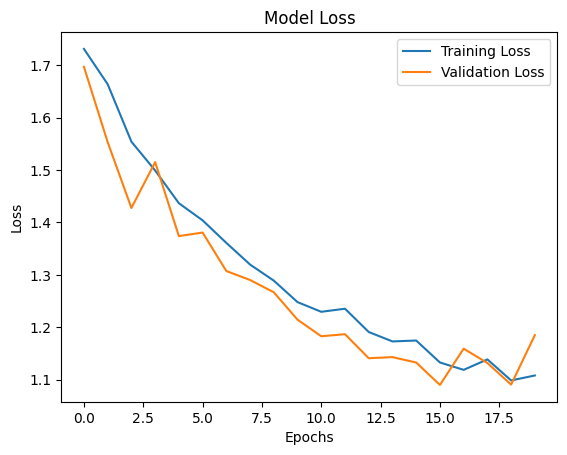

In [11]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Confusion Matrix

16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step


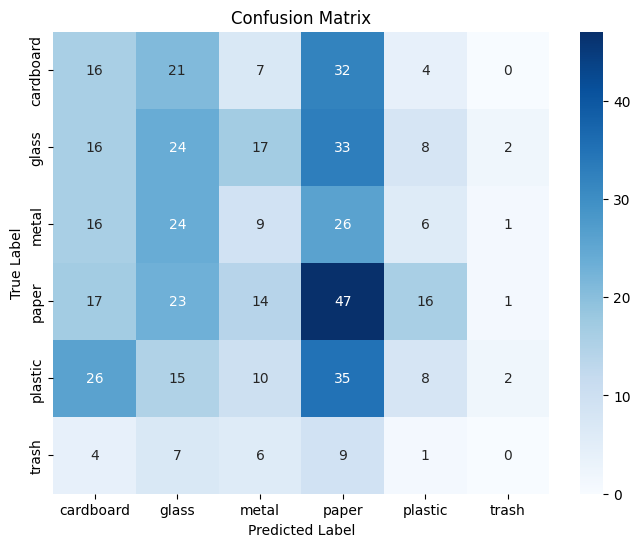

Classification Report:

              precision    recall  f1-score   support

   cardboard       0.17      0.20      0.18        80
       glass       0.21      0.24      0.22       100
       metal       0.14      0.11      0.12        82
       paper       0.26      0.40      0.31       118
     plastic       0.19      0.08      0.12        96
       trash       0.00      0.00      0.00        27

    accuracy                           0.21       503
   macro avg       0.16      0.17      0.16       503
weighted avg       0.19      0.21      0.19       503



In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get model predictions
val_preds = model.predict(val_gen)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

# Step 2: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Step 3: Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

Installing Gradio

In [13]:
!pip install gradio --quiet

In [14]:
from keras.models import load_model

# Load the saved model
model = load_model("waste_classifier_model.h5")

In [15]:
import gradio as gr
import numpy as np
from PIL import Image

# Class labels (must match your dataset)
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Prediction function
def predict_image(img):
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 224, 224, 3)
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    return f"Predicted class: {predicted_class}"

# Gradio Interface
gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="♻️ Waste Classifier",
    description="Upload an image of waste and the model will predict the category."
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dc08c658cd9341f3d6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


This is the output of the Model.